In [1]:
%config InlineBackend.figure_format='retina'

In [2]:
from qiskit import QuantumCircuit
from qiskit.circuit import ParameterVector

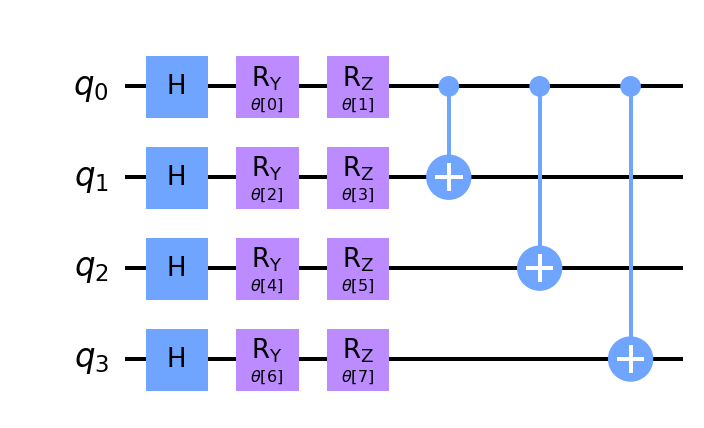

In [4]:
# specifying number of qubits for the quantum circuit
Num = 4
# create a quantum circuit (qc) object
qc = QuantumCircuit(Num)
# create all parameters inside the qc 
x = ParameterVector(r'$\theta$', length=8)
# add hadamard gate to each qubit
[qc.h(i) for i in range(Num)]  
# add parametrised gates
[qc.ry(x[int(2*i)], i) for i in range(Num)]
# add parametrised gates
[qc.rz(x[int(2*i+1)], i) for i in range(Num)]
# add controlled gates
qc.cx(0, range(1, Num))
circ = qc
circ.draw("mpl")


In [5]:
import qiskit

qiskit.__version__

'0.18.3'

In [6]:
from pqc import analyse

In [3]:
# put qc inside the analyse module to get the descriptor values
exp, ent = analyse(circ=circ,samples=100,descriptor='both',num_proc=4)
# print results
print("expressibility is: {}, entanglement is: {}".format(exp,ent))

expressibility is: 0.3926556682057455, entanglement is: 0.39003293583904786


In [7]:
from pqc import FeatureMap

In [8]:
fm = FeatureMap()

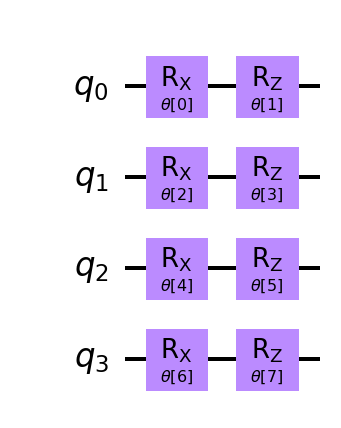

In [11]:
circ1 = fm.circuit1()
circ1.draw("mpl")

In [12]:
# put qc inside the analyse module to get the descriptor values
exp, ent = analyse(circ=circ1,samples=100,descriptor='both',num_proc=4)
# print results
print("expressibility is: {}, entanglement is: {}".format(exp,ent))

expressibility is: 0.4600580960520182, entanglement is: -1.1102230246251566e-17


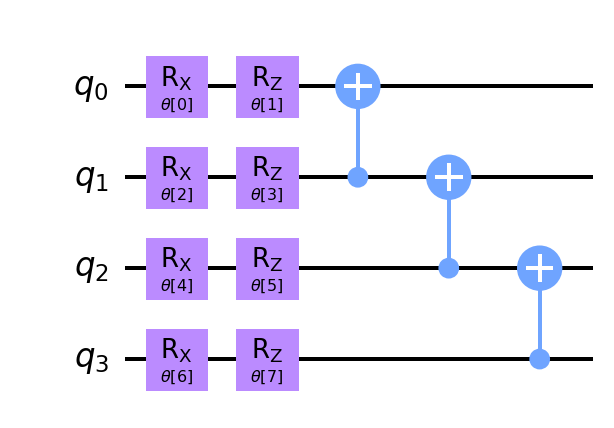

In [13]:
circ2 = fm.circuit2()
circ2.draw("mpl")

In [14]:
# put qc inside the analyse module to get the descriptor values
exp, ent = analyse(circ=circ2,samples=100,descriptor='both',num_proc=4)
# print results
print("expressibility is: {}, entanglement is: {}".format(exp,ent))

expressibility is: 0.5175896707149611, entanglement is: 0.571885029378331


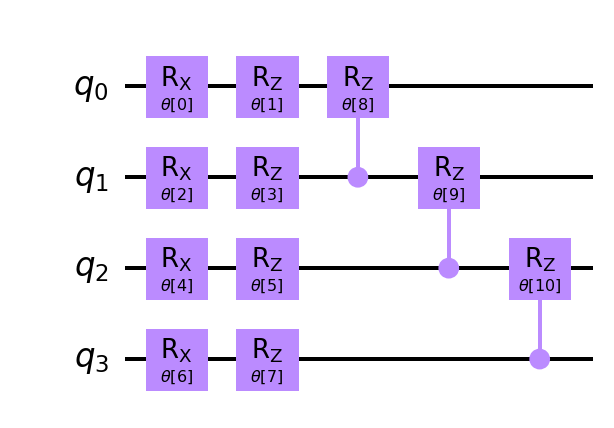

In [15]:
circ3 = fm.circuit3()
circ3.draw("mpl")

In [16]:
# put qc inside the analyse module to get the descriptor values
exp, ent = analyse(circ=circ3,samples=100,descriptor='both',num_proc=4)
# print results
print("expressibility is: {}, entanglement is: {}".format(exp,ent))

expressibility is: 0.8673855521973931, entanglement is: 0.15675411760063893


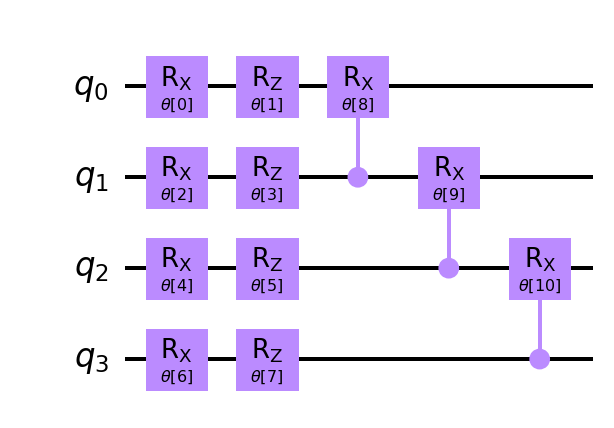

In [17]:
circ4 = fm.circuit4()
circ4.draw("mpl")

In [18]:
# put qc inside the analyse module to get the descriptor values
exp, ent = analyse(circ=circ4,samples=100,descriptor='both',num_proc=4)
# print results
print("expressibility is: {}, entanglement is: {}".format(exp,ent))

expressibility is: 0.5817899345822842, entanglement is: 0.2957346121619664


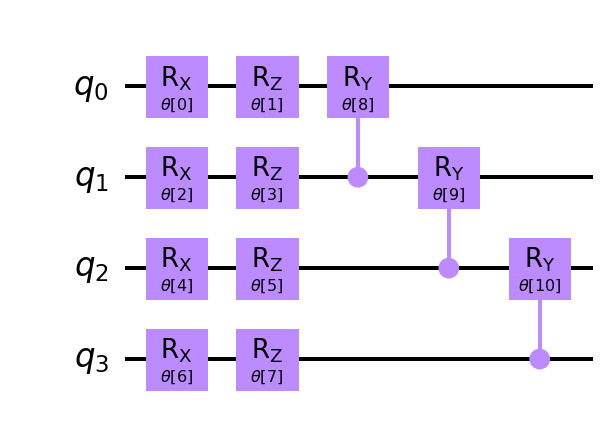

In [9]:
circ5 = fm.circuit5()
circ5.draw("mpl")

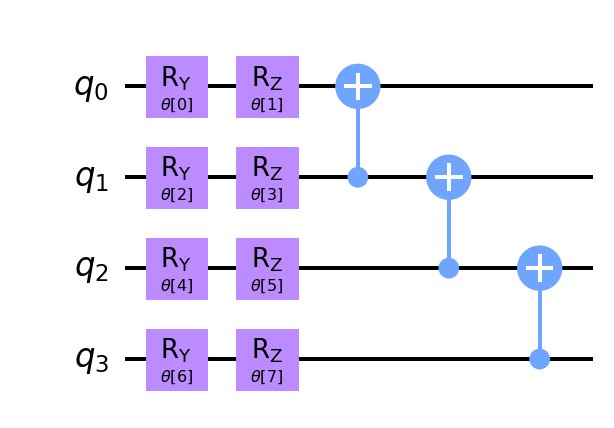

In [10]:
circ6 = fm.circuit6()
circ6.draw("mpl")

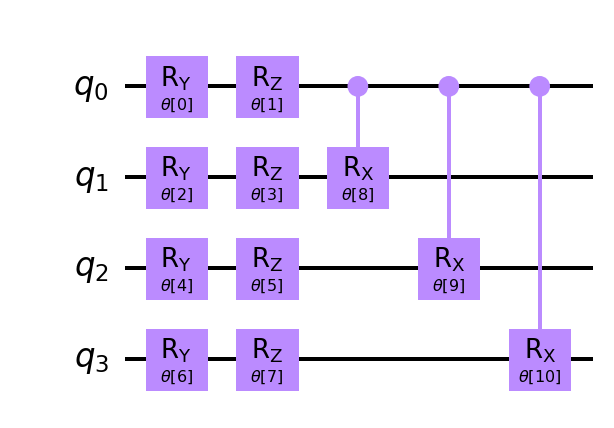

In [11]:
circ7 = fm.circuit7()
circ7.draw("mpl")

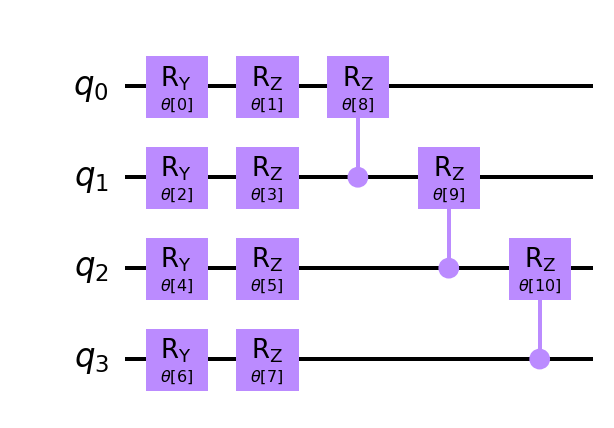

In [12]:
circ8 = fm.circuit8()
circ8.draw("mpl")

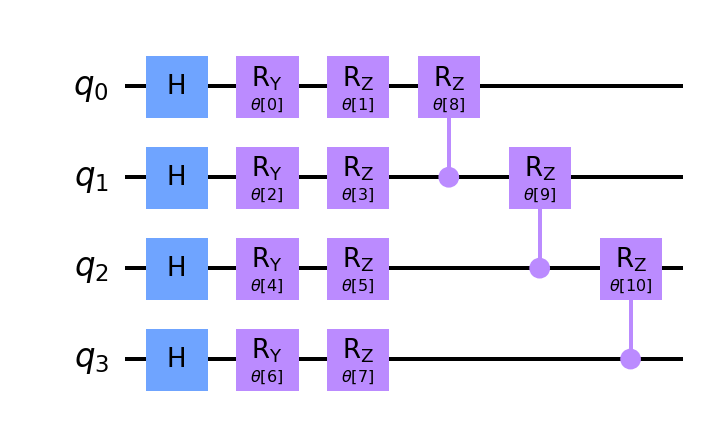

In [13]:
circ9 = fm.circuit9()
circ9.draw("mpl")

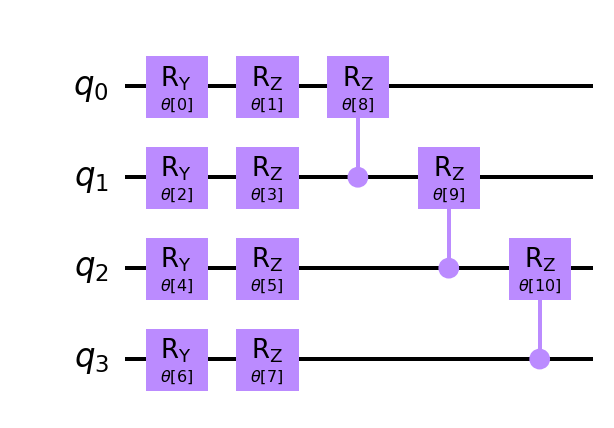

In [14]:
circ10 = fm.circuit10()
circ10.draw("mpl")

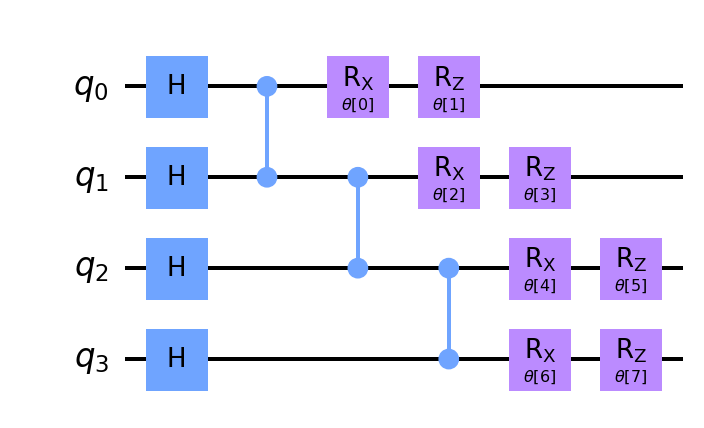

In [15]:
circ11 = fm.circuit11()
circ11.draw("mpl")

In [16]:
Circ = [circ1,circ2,circ3,circ4,circ5,circ6,circ7,circ8,circ9,circ10]
Exp = []
Ent = []
for qc in Circ:
    
    ana = Analyser(circ=qc,samples=100,num_proc=4)
    # print results
    exp = ana.get_expressibility()
    ent = ana.get_entanglement()
    print("expressibility is: {}, entanglement is: {}".format(exp,ent))
    Exp.append(exp)
    Ent.append(ent)


expressibility is: 0.8711962891895288, entanglement is: -1.9984014443252817e-17
expressibility is: 0.5789654810904473, entanglement is: 0.5570298814477779
expressibility is: 0.3822923935897914, entanglement is: 0.16728692583027957
expressibility is: 0.23665953063156442, entanglement is: 0.2758224404409883
expressibility is: 0.20320249399406137, entanglement is: 0.2821517765414951
expressibility is: 0.38893187724316564, entanglement is: 0.509447775616546
expressibility is: 0.3106678331734818, entanglement is: 0.21517643205471018
expressibility is: 0.5851023681470084, entanglement is: 0.16997581973360823
expressibility is: 0.42594492593522965, entanglement is: 0.19159946601461367
expressibility is: 0.5909355396076972, entanglement is: 0.17679940345091227


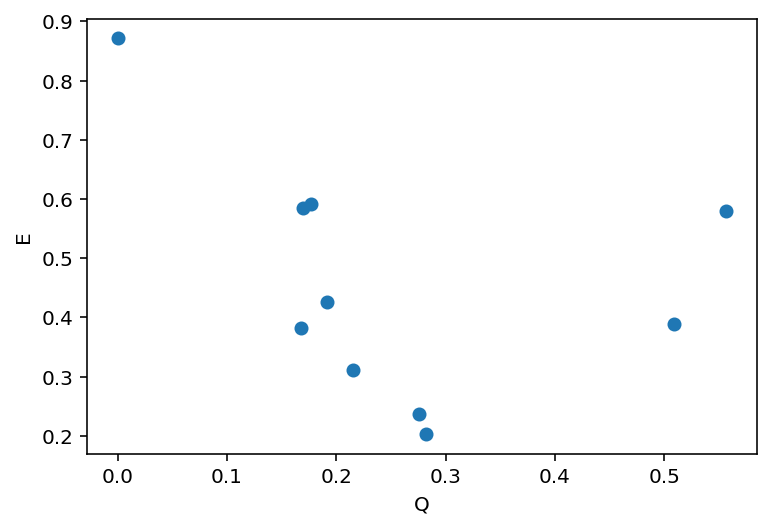

In [17]:
import matplotlib.pyplot as plt

plt.scatter(Ent,Exp)
plt.xlabel("Q")
plt.ylabel("E")
plt.show()

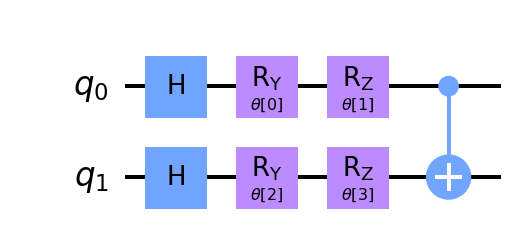

In [18]:
Num = 2
# create a quantum circuit (qc) object
qc = QuantumCircuit(Num)
# create all parameters inside the qc 
x = ParameterVector(r'$\theta$', length=8)
# add hadamard gate to each qubit
[qc.h(i) for i in range(Num)]  
# add parametrised gates
[qc.ry(x[int(2*i)], i) for i in range(Num)]
# add parametrised gates
[qc.rz(x[int(2*i+1)], i) for i in range(Num)]
# add controlled gates
qc.cx(0, range(1, Num))
circ = qc
circ.draw("mpl")

In [19]:
import numpy as np
samples = 10
theta = [
    {p: 2 * np.random.random() * np.pi for p in circ.parameters}
    for _ in range(samples)
]
phi = [
    {p: 2 * np.random.random() * np.pi for p in circ.parameters}
    for _ in range(samples)
]



In [20]:
import qiskit

def simulate(circ,theta):
    circuit =  circ.assign_parameters(theta)
    circuit.snapshot("final", snapshot_type="statevector")
    result = qiskit.execute(
        circuit, qiskit.Aer.get_backend("aer_simulator_statevector")
    ).result()
    result_data = result.data(0)["snapshots"]["statevector"]["final"][0]
    print(result_data,len(result_data))
    return result_data
    

In [21]:
simulate(circ,theta[0])

[-1.42294995e-02-0.9954594j  -2.04508260e-05+0.00143069j
  2.46118735e-03+0.01514345j  1.48946158e-02-0.09164515j] 4


array([-1.42294995e-02-0.9954594j , -2.04508260e-05+0.00143069j,
        2.46118735e-03+0.01514345j,  1.48946158e-02-0.09164515j])

In [22]:
ana.__dict__.keys()

dict_keys(['_circ', '_num_qubits', '_samples', '_num_params', '_num_proc', 'thetas', 'phis', 'theta_circuits', 'phi_circuits', '_method_ex', '_method_ec'])